In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from bokeh.charts import Scatter
from pylab import*


In [2]:
csv_path = os.path.join('raw_data','city_data.csv')
csv_path1=os.path.join('raw_data','ride_data.csv')
cars_df = pd.read_csv(csv_path)
ride_df = pd.read_csv(csv_path1)


In [3]:
pyuber = pd.merge(cars_df,ride_df,on='city')
pyuber.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [137]:
urban_type = pyuber.groupby(['type'])['fare'].sum()
urban_type.head()
#urban_type = pyuber['type'].groupby(pyuber['fare']).sum()
#urban_type.head()


type
Rural        4255.09
Suburban    20335.69
Urban       40078.34
Name: fare, dtype: float64

In [89]:
total = pyuber["fare"].sum()
print(round(total,2))


64669.12


In [201]:
percentage_fare_bycity=(urban_type/total)*100
percentage_fare_bycity

type
Rural        6.579786
Suburban    31.445750
Urban       61.974463
Name: fare, dtype: float64

In [142]:
#rural_total=urban_type["Rural"]
#rural_total
#percentage_rural= round((rural_total/total)*100,2)
#percentage_rural
#suburban_total = urban_type["Suburban"]
#print("Suburban Total",suburban_total)
#percentage_suburban = round((suburban_total/total)*100,2)
#print("Suburban_Percentage",percentage_suburban)
#urban_total=urban_type["Urban"]
#print("Urban_Total",urban_total)
#percentage_urban =round((urban_total/total)*100,2)
#print("Urban_Percentage",percentage_urban)

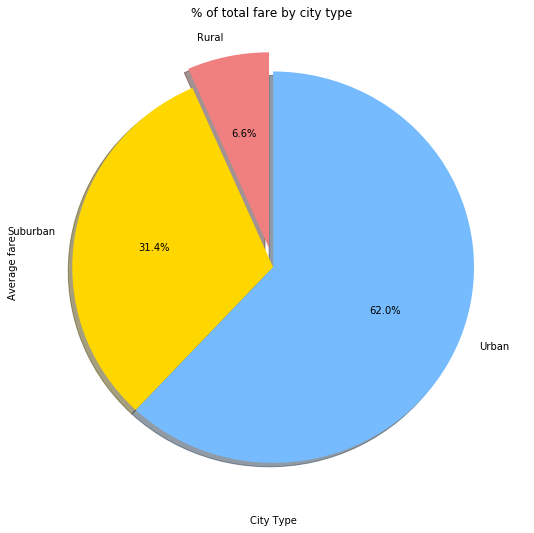

In [274]:

labels = "Rural","Suburban","Urban"
explode=[0.1,0,0]
colors= ['lightcoral','gold','xkcd:sky blue']
fare_percentage = percentage_fare_bycity.plot(kind="pie",labels=labels,figsize=(9,9),colors=colors,
                                             shadow=True,explode=explode,startangle=90,autopct='%1.1f%%')

fare_percentage.set_title("% of total fare by city type ")
fare_percentage.set_xlabel("City Type")
fare_percentage.set_ylabel("Average fare")
       
plt.show()

In [143]:
#rides= pyuber.groupby(['type','city'])[['ride_id']].count()
#rides.head()
rides= pyuber.groupby(['type'])['ride_id'].count()
rides


type
Rural        125
Suburban     657
Urban       1625
Name: ride_id, dtype: int64

In [144]:
total_rides = pyuber["ride_id"].count()
total_rides

2407

In [145]:
percentage_rides_type = (rides/total_rides)*100
percentage_rides_type

type
Rural        5.193187
Suburban    27.295388
Urban       67.511425
Name: ride_id, dtype: float64

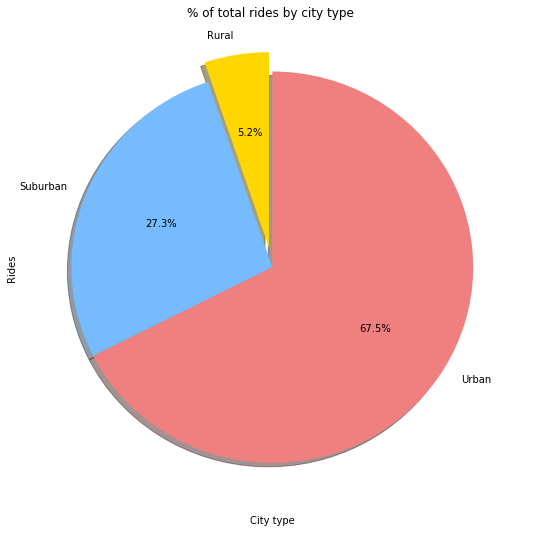

In [270]:
labels = "Rural","Suburban","Urban"
explode=[0.1,0,0]
colors= ['gold','xkcd:sky blue','lightcoral']
rides_percentage= percentage_rides_type.plot(kind="pie",labels=labels,figsize=(9,9),colors=colors,
                                             shadow=True,startangle=90,explode=explode,autopct='%1.1f%%')
rides_percentage.set_title("% of total rides by city type ")
rides_percentage.set_xlabel("City type")
rides_percentage.set_ylabel("Rides")

plt.show()

In [150]:
driver_total = pyuber.groupby(["type"])["driver_count"].sum()
driver_total

type
Rural         727
Suburban     9730
Urban       64501
Name: driver_count, dtype: int64

In [151]:
total_driver_count = pyuber["driver_count"].sum()
total_driver_count

74958

In [152]:
percentage_driver_count = (driver_total/total_driver_count)*100
percentage_driver_count

type
Rural        0.969876
Suburban    12.980602
Urban       86.049521
Name: driver_count, dtype: float64

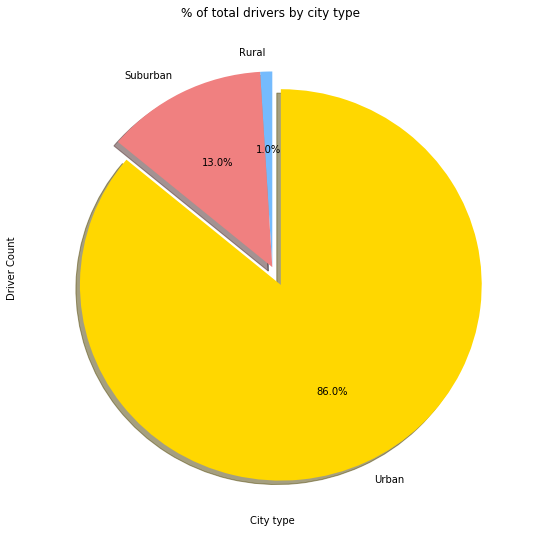

In [275]:
labels = "Rural","Suburban","Urban"
#sizes = [15,75,55]
explode = [0,0,0.1]
colors= ['xkcd:sky blue','lightcoral','gold']
driver_count_percentage = percentage_driver_count.plot(kind="pie",labels = labels,figsize=(9,9),colors=colors,
                                             shadow=True,startangle=90,explode=explode,autopct='%1.1f%%')

driver_count_percentage.set_title("% of total drivers by city type ",)
driver_count_percentage.set_xlabel("City type")
driver_count_percentage.set_ylabel("Driver Count")
plt.show()

In [162]:
new_data=pyuber.iloc[:,[0,2,4,5]]
new_data.head()

,city,type,fare,ride_id
0,Kelseyland,Urban,5.51,6246006544795
1,Kelseyland,Urban,5.54,7466473222333
2,Kelseyland,Urban,30.54,2140501382736
3,Kelseyland,Urban,12.08,1896987891309
4,Kelseyland,Urban,17.91,8784212854829


In [50]:
type_urban = new_data.loc[new_data["type"]=="Urban"]
type_urban.head()


,city,type,fare,ride_id
0,Kelseyland,Urban,5.51,6246006544795
1,Kelseyland,Urban,5.54,7466473222333
2,Kelseyland,Urban,30.54,2140501382736
3,Kelseyland,Urban,12.08,1896987891309
4,Kelseyland,Urban,17.91,8784212854829


In [52]:
urban_group = type_urban.groupby(['city'])['fare'].mean()
urban_group.head()
                             
                            

city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Antoniomouth    23.625000
Aprilchester    21.981579
Arnoldview      25.106452
Name: fare, dtype: float64

In [83]:
urban_count = type_urban.groupby(['city'])['fare'].count()
urban_count.head()

city
Alvarezhaven    31
Alyssaberg      26
Antoniomouth    22
Aprilchester    19
Arnoldview      31
Name: fare, dtype: int64

In [54]:
urban_ride = type_urban.groupby(['city'])['ride_id'].count()
urban_ride.head()

city
Alvarezhaven    31
Alyssaberg      26
Antoniomouth    22
Aprilchester    19
Arnoldview      31
Name: ride_id, dtype: int64

In [63]:
type_suburban = new_data.loc[new_data["type"]=="Suburban"]
type_suburban.head()

,city,type,fare,ride_id
1625,Carrollbury,Suburban,25.00,485795568537
1626,Carrollbury,Suburban,49.47,617204620844
1627,Carrollbury,Suburban,35.33,73368831241
1628,Carrollbury,Suburban,20.26,7948046018548
1629,Carrollbury,Suburban,46.67,4786094151694


In [64]:
suburban_group = type_suburban.groupby(['city'])['fare'].mean()
suburban_group.head()

city
Anitamouth      37.315556
Campbellport    33.711333
Carrollbury     36.606000
Clarkstad       31.051667
Conwaymouth     34.591818
Name: fare, dtype: float64

In [65]:
suburban_ride = type_suburban.groupby(['city'])['ride_id'].count()
suburban_ride.head()

city
Anitamouth       9
Campbellport    15
Carrollbury     10
Clarkstad       12
Conwaymouth     11
Name: ride_id, dtype: int64

In [68]:
type_rural = new_data.loc[new_data["type"]=="Rural"]
type_rural.head()

,city,type,fare,ride_id
2282,South Elizabethmouth,Rural,22.79,8193837300497
2283,South Elizabethmouth,Rural,26.72,4943246873754
2284,South Elizabethmouth,Rural,46.39,1939838068038
2285,South Elizabethmouth,Rural,31.09,2959749591417
2286,South Elizabethmouth,Rural,16.50,5702608059064


In [69]:
rural_group = type_rural.groupby(['city'])['fare'].mean()
rural_group.head()

city
East Leslie       33.660909
East Stephen      39.053000
East Troybury     33.244286
Erikport          30.043750
Hernandezshire    32.002222
Name: fare, dtype: float64

In [70]:
rural_ride = type_rural.groupby(["city"])["ride_id"].count()
rural_ride.head()

city
East Leslie       11
East Stephen      10
East Troybury      7
Erikport           8
Hernandezshire     9
Name: ride_id, dtype: int64

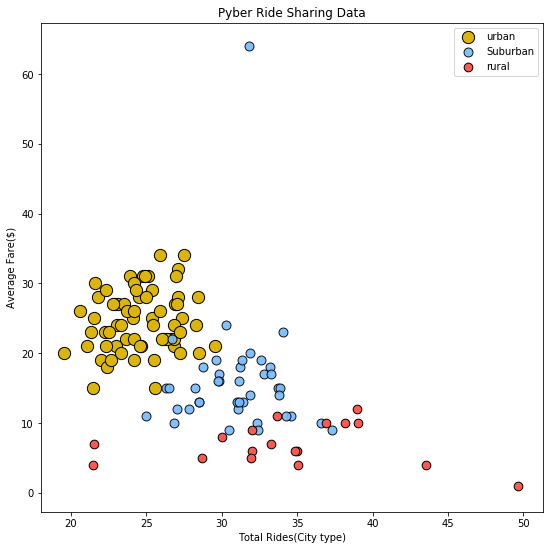

In [264]:
x=np.random.randn(10)
#urban = ['urban_group','urban_ride']
plt.figure(figsize=(9,9))
#colors= ["gold","light sky blue","light coral"]
plt.scatter(urban_group,urban_ride, s=150,edgecolor="black",color='xkcd:gold',label="urban",linewidth=1.0,alpha=1.0)
plt.scatter(suburban_group,suburban_ride,s=80, edgecolor="black",color='xkcd:sky blue',label ="Suburban",alpha=0.9)
plt.scatter(rural_group,rural_ride, s=75, edgecolor="black",color='xkcd:coral',label = "rural")
plt.legend(loc="upper right")
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Rides(City type)")
plt.ylabel("Average Fare($)")

plt.show()